#### **Project Name**  -

##### **Project Type**   - Unsupervised Learning

##### **Name** - Yugal Chambhare

#### **Project Summary**

**Bussiness Needs**

From the last few years, with the rise of internet users, E-commerce, Social media plotforms and many other platforms like service providers using recommendation system to grow their bussiness. From E-commerance(recommonding users to buy product based on historical search data) or social media(By recommending post based on their revise interest), Recommendation systems are unenvitable in todays world of Internet.

Recommendation systems is essential for many industries like OTT platforms, which they can recommend the movies/webseries based on the previous watched show or like if you search some product on Amazon it just started giving you suggestion about the relavent product, same thing worked in YouTube or any news provider industries.




**Dataset Description**

The Book-Crossing dataset comprises 3 files.

Users:

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

Books:

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

Ratings:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.



#### **GitHub Link** -

**https://github.com/yugal18/Book-Recommendation-System-Project**

#### **Problem Statement** -



* The aim of this project is to develop a recommendation system that can accurately suggest books to users based on their past ratings and preferences, utilizing the Book-Crossing dataset.

*   understand the problem statement and the dataset.
*   Use necessity preprocessing steps to convert the raw data into usable form.

*   In Nutshell, How this project is usefull for the stackholders(e.g., online bookstores, library systems, or educational platforms).




# ***Let Build It!***

## **1. Understand the Data**

### Import important Libraries


In [1]:
# Import Libraries
import pandas as pd  # For data manipulation and analysis, such as creating and modifying dataframes.
import numpy as np  # For numerical computations, including handling arrays and performing mathematical operations.


import matplotlib.pyplot as plt  # For creating static, interactive, and dynamic visualizations.
import seaborn as sns  # For statistical data visualization, built on top of Matplotlib for more attractive and informative plots.


import warnings  # For controlling the display of warnings, such as suppressing unnecessary warning messages.

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')  # We use this to ignore warnings that might clutter the output but are not critical.

### Prepare the dataset

In [2]:
#download the dataset directly from kaggle dataset page.

import kagglehub
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [3]:
#List all the files present in the dataset.
import os
print(os.listdir(path))


['DeepRec.png', 'Books.csv', 'Ratings.csv', 'classicRec.png', 'recsys_taxonomy2.png', 'Users.csv']


In [4]:
# Load Dataset
path = '/root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3'

book_file = f"{path}/Books.csv"
user_file = f"{path}/Users.csv"
Rating_file = f"{path}/Ratings.csv"


book_df = pd.read_csv(book_file)
user_df = pd.read_csv(user_file)
rating_df = pd.read_csv(Rating_file)

### View the dataset

In [5]:
print("Book Dataset:\n")
display(book_df.sample(3))
print("\nUser Dataset:\n")
display(user_df.sample(3))
print("\nRating Dataset:\n")
display(rating_df.sample(3))

Book Dataset:



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
165917,156884915X,"C for Dummies, Volume 2",Dan Gookin,1997,For Dummies,http://images.amazon.com/images/P/156884915X.0...,http://images.amazon.com/images/P/156884915X.0...,http://images.amazon.com/images/P/156884915X.0...
176853,0553111639,Callahan's Key (Bantam Spectra Book),Spider Robinson,2000,Bantam Books,http://images.amazon.com/images/P/0553111639.0...,http://images.amazon.com/images/P/0553111639.0...,http://images.amazon.com/images/P/0553111639.0...
156296,0394585232,Blossom,Andrew H. Vachss,1990,Daedalus Books,http://images.amazon.com/images/P/0394585232.0...,http://images.amazon.com/images/P/0394585232.0...,http://images.amazon.com/images/P/0394585232.0...



User Dataset:



,User-ID,Location,Age
207240,207241,"sao paulo, sao paulo, brazil",19.0
42653,42654,"austin, texas, usa",42.0
96112,96113,"birkenhead, england, united kingdom",32.0



Rating Dataset:



,User-ID,ISBN,Book-Rating
1099644,264082,0425117383,5
696084,169773,0156012197,10
101374,23768,0156007096,0


### shape of the data



In [6]:
print("Shape of Book Dataset:", book_df.shape)
print("Shape of User Dataset:", user_df.shape)
print("Shape of Rating Dataset:", rating_df.shape)

Shape of Book Dataset: (271360, 8)
Shape of User Dataset: (278858, 3)
Shape of Rating Dataset: (1149780, 3)


### Dataset Information

In [7]:
print("Book Dataset Information:\n")
print(book_df.info())
print("--"*30)
print("\nUser Dataset Information:\n")
print(user_df.info())
print("--"*30)
print("\nRating Dataset Information:\n")
print(rating_df.info())


Book Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None
------------------------------------------------------------

User Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64 

### Duplicate Value(Columns if duplicates present in it)

In [8]:
print("Duplicate Values in Book Dataset:", book_df.duplicated().sum())
print("Duplicate Values in User Dataset:", user_df.duplicated().sum())
print("Duplicate Values in Rating Dataset:", rating_df.duplicated().sum())

Duplicate Values in Book Dataset: 0
Duplicate Values in User Dataset: 0
Duplicate Values in Rating Dataset: 0


### Missing Values

In [9]:
# Missing Values/Null Values Count
print("Books Dataset:")
print(book_df.isnull().sum())
print('------------------')
print("Users Dataset:")
print(user_df.isnull().sum())
print('-------------------')
print("Ratings Dataset:")
print(rating_df.isnull().sum())

Books Dataset:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
------------------
Users Dataset:
User-ID          0
Location         0
Age         110762
dtype: int64
-------------------
Ratings Dataset:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


### This is what we find out from the datasets.

The Book-Crossing dataset comprises 3 files.

Users:

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

Books:

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavours (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

Ratings:

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

---

**Plan** : So, the plan is, first we've to indetify the popular booksa among the users, trends and book popular countries using EDA and also we will perform collaborative filtering and also the relationship between Book with different books using cosine similarity(Give the higher positive value for two books similar and dissimilar will be low value or negative).

## **2. Understanding Your Variables**

In [10]:
datasets = [book_df, user_df, rating_df]

for i, df in enumerate(datasets):
  variables_of_df = [col for col in df.columns]
  print(f"Variables of dataset {i + 1} : {variables_of_df}")


Variables of dataset 1 : ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
Variables of dataset 2 : ['User-ID', 'Location', 'Age']
Variables of dataset 3 : ['User-ID', 'ISBN', 'Book-Rating']


In [11]:
# Dataset Describe
print("Books Dataset:\n")
display(book_df.describe())
print('--'*40)
print("\nUsers Dataset:\n")
display(user_df.describe())
print('--'*40)
print("\nRatings Dataset:\n")
display(rating_df.describe())

Books Dataset:



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


--------------------------------------------------------------------------------

Users Dataset:



,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


--------------------------------------------------------------------------------

Ratings Dataset:



,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variable Describes

**Books Dataset:**

**ISBN:** Unique identifier for each book (International Standard Book Number).

**Book_Title:** The title of the book.

**Book_Author:** The name of the author who wrote the book.

**Year_Of_Publication**: The year the book was published.

**Publisher:** The name of the company that published the book.

**Image_URL_S:** URL for a small-sized image of the book cover.


**Image_URL_M:** URL for a medium-sized image of the book cover.

**Image_URL_L:** URL for a large-sized image of the book cover.

**Users Dataset:**

**User_ID:** A unique identifier for each user.

**Location:** The city, state, and country where the user resides.

**Age:** The age of the user, if available.

**Ratings Dataset**:

**User_ID**: A unique identifier for each user, used to match with the Users dataset.

**ISBN**: The unique identifier for the book, used to match with the Books dataset.

**Book_Rating**: A numerical rating (usually between 0 and 10) given by the user to the book.

### Unique values in the datasets

In [12]:
# Check Unique Values for each variable.
print("Books Dataset:")
print(book_df.nunique())
print('--'*20)
print("Users Dataset:")
print(user_df.nunique())
print('--'*20)
print("Ratings Dataset:")
print(rating_df.nunique())

Books Dataset:
ISBN                   271360
Book-Title             242135
Book-Author            102022
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64
----------------------------------------
Users Dataset:
User-ID     278858
Location     57339
Age            165
dtype: int64
----------------------------------------
Ratings Dataset:
User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


## 3. **Data Wrangling**

In [13]:
#In the user_df dataset age is not providing much information. so, we simply drop that feature.

user_df.drop('Age', axis=1, inplace=True)

### Handling missing values

In [14]:
# Missing Values/Null Values Count
print("Books Dataset:")
print(book_df.isnull().sum())
print('------------------')
print("Users Dataset:")
print(user_df.isnull().sum())
print('-------------------')
print("Ratings Dataset:")
print(rating_df.isnull().sum())

Books Dataset:
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
------------------
Users Dataset:
User-ID     0
Location    0
dtype: int64
-------------------
Ratings Dataset:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [15]:
#drop null values

user_df.dropna(inplace = True)
book_df.dropna(inplace = True)
rating_df.dropna(inplace = True)

### This all manipulations have you done and insights you found.


**Removing Null Values:**

Action: All rows with null values have been removed from the dataset because there was only 3/4 null values was present could you median/mode to fill the null values.

Impact: This ensures that only complete data is keep for analysis, reducing the potential for errors or incomplete insights.

**Removing the Age Column from the Users Dataset:**

Action: The Age column was removed from the Users dataset becuase it wasn't providing any necessity information.

**Insights Derived:**

Completeness of Data:

After removing null values, the dataset is now clean and free from missing information, which improves the accuracy and reliability of further analysis.

User Demographics:

Removing the Age column means demographic factors like age will not be considered in the analysis of user behavior, limiting insights on how different age groups interact with books.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart - A

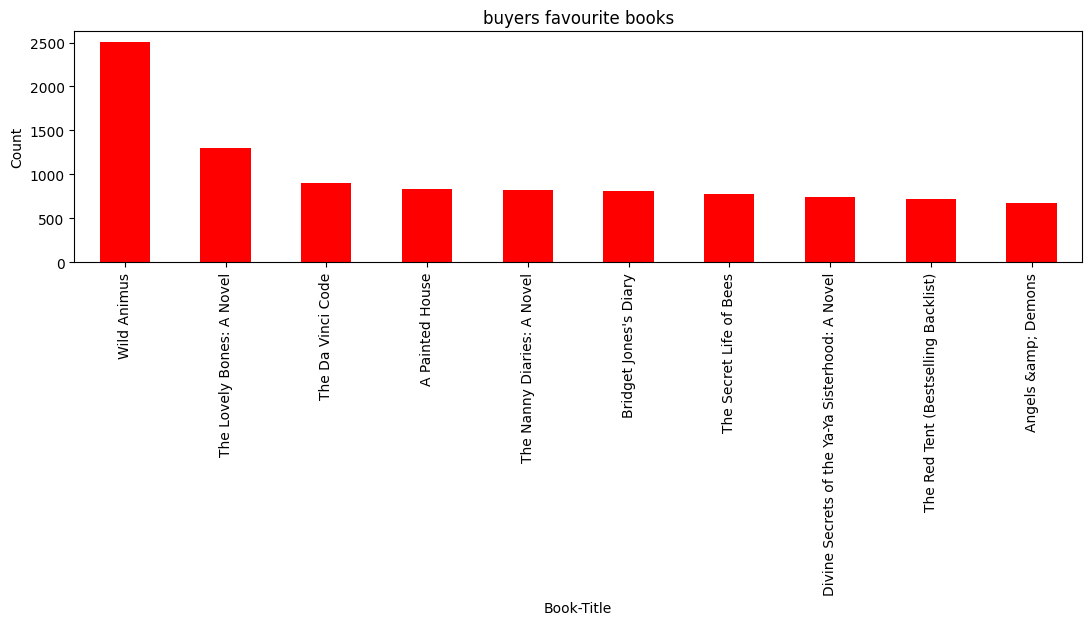

In [16]:
# Chart - A(Top Books)
plt.figure(figsize = (13,3))
book_rating_merge=pd.merge(rating_df,book_df, how='inner', on='ISBN')
book_freq=book_rating_merge['Book-Title'].value_counts().head(10)
book_freq.plot(kind='bar', color = 'r')
plt.xlabel('Book-Title')
plt.ylabel('Count')
plt.title('buyers favourite books')
plt.show()

##### 1. Why did we picked this bar chart

The bar chart is an appropriate choice for this data because it visually represents the frequency of each popular book title. The horizontal axis lists the book titles, and the vertical axis represents the count of readers who chose each book. This format makes it easy to compare the popularity of different books at a glance.

##### 2. What we find out from this chart

The chart provides a clear visual representation of the popularity of each book.

It highlights the significant popularity of "**Wild and Anxious**" and suggests a relatively even distribution of reader preferences for the other titles.

##### 3. Will the gained insights help creating a positive business impact?

**Insights**

Targeted Marketing: The chart can help identify which books are most popular among readers. This information can be used to target marketing efforts towards these titles, increasing the likelihood of sales and promoting them to a wider audience.

Content Recommendations: The chart can be used to recommend similar books to readers. By suggesting titles that are popular and align with a reader's preferences, retailers can increase customer satisfaction and encourage repeat purchases.

Negative implications
Overreliance on Popularity: If a retailer becomes overly reliant on the most popular titles, they may miss out on opportunities to discover and promote new or less popular books that could have a significant impact on their business.

#### Chart - B

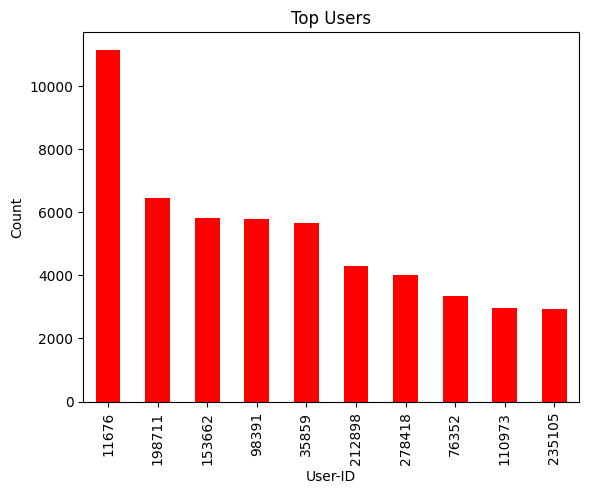

In [17]:
user_count = book_rating_merge['User-ID'].value_counts().head(10)
user_count.plot(kind = 'bar', color = 'r')
plt.xlabel('User-ID')
plt.ylabel('Count')
plt.title('Top Users')
plt.show()

##### 1. Why did we select this chart?

A bar chart was the most suitable choice for this data because it effectively compares the frequencies of different User IDs. The horizontal axis lists the User IDs, and the vertical axis represents the count of ratings each user has provided. This format allows for easy visual comparison of the rating activity among different users.

##### 2. What we found out from this chart

User Activity: There's a significant variation in the number of ratings provided by different users.

Top Raters: User ID 11676 stands out as the most active user, providing significantly more ratings than others.

Clustering: The chart also reveals clusters of users with similar levels of rating activity. For instance, there's a group of users with ratings between 100,000 and 200,000

##### 3. Will the gained insights help creating a positive business impact?

Targeted User Engagement: By identifying highly active users, a business can tailor marketing strategies or offer exclusive benefits to foster loyalty and encourage further engagement.

Community Building: Recognizing and promoting top raters can create a sense of community and encourage other users to participate more actively.

Data-Driven Recommendations: Analyzing user rating patterns can help refine recommendation systems, providing more personalized and relevant suggestions.

However, there's a potential negative aspect:

Over-reliance on Top Raters: If a business becomes overly dependent on a small group of highly active users, it may miss out on valuable feedback from a wider range of customers. This could lead to skewed product or service assessments and hinder innovation.

#### Chart - C

<Figure size 500x100 with 0 Axes>

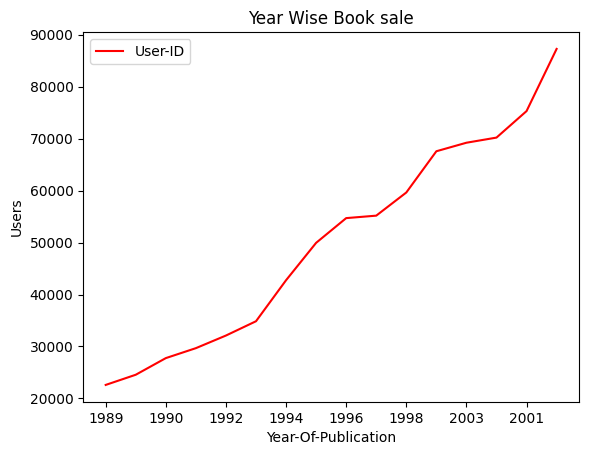

In [18]:
# Chart - 3 Year Wise Book sale
year_of_pb=book_rating_merge[book_rating_merge['Year-Of-Publication']!=0]
year_sale=year_of_pb.groupby('Year-Of-Publication')['User-ID'].count().sort_values().reset_index()
ys=year_sale[year_sale['User-ID']>20000]
plt.figure(figsize=(5,1))
ys.plot(x='Year-Of-Publication',y='User-ID',kind='line', color = 'r')
plt.xlabel('Year-Of-Publication')
plt.ylabel('Users')
plt.title('Year Wise Book sale')
plt.show()


##### 1. Why did you pick the specific chart?


A line chart was the most appropriate choice for this data because it effectively visualizes the trend of book sales over time. The horizontal axis represents the Year-of-Publication, and the vertical axis displays the number of Users. This format allows for easy observation of the growth or decline in book sales across different years.

##### 2. What are the insights found from the chart?

There's a clear upward trend in book sales over the years.


##### 3. Will the gained insights help creating a positive business impact?


Product Strategy: By understanding the historical sales trends, businesses can make informed decisions about which genres or authors to focus on.
Marketing Campaigns: The chart can help identify optimal times for marketing campaigns and promotions based on peak sales periods.
Inventory Management: Predicting future sales trends can aid in inventory planning, ensuring sufficient stock levels to meet demand.

However, there's a potential negative aspect:

Overreliance on Past Trends: If a business becomes overly reliant on past trends without considering other factors (e.g., changing consumer preferences, economic conditions), it may miss out on opportunities or face challenges.

#### Chart - D

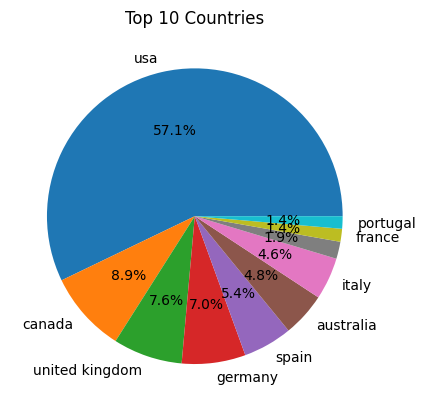

In [19]:
# Chart - 4 Top 10 country
# Extract country from the Location column
user_df['Country'] =user_df['Location'].apply(lambda x: x.split(',')[-1].strip())
users=user_df['Country'].value_counts().head(10)
plt.pie(users, labels=users.index, autopct='%1.1f%%')
plt.title('Top 10 Countries')
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart was the most suitable choice for this data because it effectively represents the relative proportions of each country in the overall total. The size of each slice indicates the percentage of the total represented by that country, making it easy to compare contributions visually.

##### 2. What are the insights found from the chart?

Dominance of the USA: The USA occupies the largest slice of the pie, representing a significantly higher percentage (57.1%) compared to all other countries.

Regional Distribution: The chart reveals a concentration of countries from North America, Europe, and Oceania, with a limited representation from other regions.

Smaller Contributions: Several countries, including Portugal, France, and Italy, have relatively small percentages, indicating their lesser contributions to the overall total.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Market Targeting: The chart can help businesses identify key markets with the highest potential for growth and customer acquisition.

Product Localization: Understanding the distribution of countries can guide businesses in tailoring their products or services to specific regional preferences.

Global Expansion: The chart can inform decisions about expanding into new markets based on the relative size and potential of each country.

However, there's a potential negative aspect:

Overreliance on the Dominant Market: If a business becomes overly dependent on the USA, it may be vulnerable to economic fluctuations or changes in consumer preferences within that country.

#### Chart - E

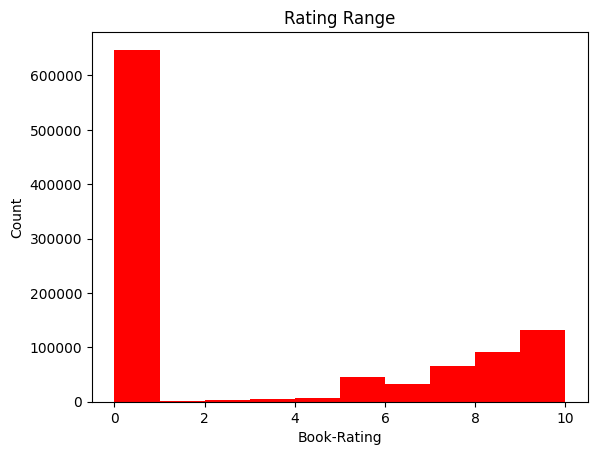

In [20]:
# Rating Range
book_rating_merge['Book-Rating'].plot(kind='hist', color = 'r')
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.title('Rating Range')
plt.show()

##### 1. Why did you pick the specific chart?

Distribution Visualization: It effectively shows the distribution of book ratings across different intervals.

Frequency Representation: The y-axis ("Count") represents the frequency of book ratings within each interval, providing a clear understanding of the data's concentration.

Categorical Data: Book ratings are categorical data, making a histogram suitable for visualizing their distribution.

##### 2. What are the insights found from the chart?

Unrated Books: A significant portion of the dataset may consist of books that haven't received any ratings.

Rating Behavior: If a large number of books remain unrated, it could indicate a need to encourage more user engagement and reviews.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Review Campaigns: Implementing strategies to encourage users to leave reviews can improve the quality and quantity of rating data.

Recommendation System: The recommendation system should be adjusted to account for unrated books, potentially suggesting popular or highly-rated books that haven't been reviewed by a specific user.

#### Chart - 06 - Pair Plot

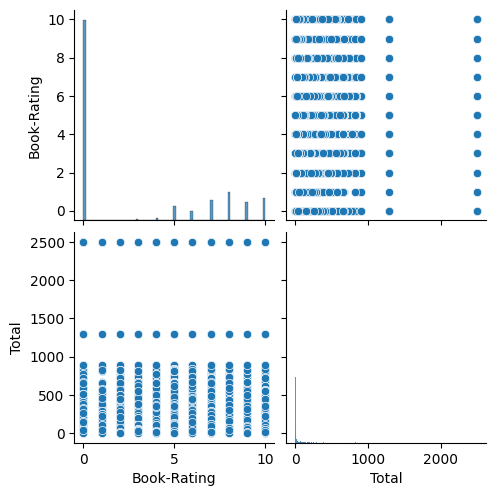

In [21]:
# Pair Plot visualization code
rbu=pd.merge(book_rating_merge,user_df, how='inner', on='User-ID')
rbu.head()
user_review_count = rbu.groupby('Book-Title')['User-ID'].count().sort_values().reset_index()
user_review_count.columns = ['Book-Title', 'Total']
pair=pd.merge(rbu, user_review_count, how='inner', on='Book-Title')
sns.pairplot(pair[['Book-Rating','Total']])

##### 1. Why did you pick the specific chart?

To analyze the relationships

##### 2. What are the insights found from the chart?

To create a pair plot in Python, you typically need numeric data, and since there are less number of nmumeric data it doesn't any proper insights.

## **5. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [22]:
# Handling Missing Values & Missing Value Imputation
rbu.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

We have already handle the missing values before EDA process so there are no null values present.



## 2. Feature Manipulation & Selection

###Feature Selection

### **For Popularity based Recommendation system**

In [23]:
popular_book_rating = book_rating_merge.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending = False).reset_index()
popular_book_rating.columns = ['Book-Title', 'Total Rating']

plr = book_rating_merge.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending = False).reset_index()
plr.columns = ['Book-Title', 'Average Rating']

popular_book = pd.merge(popular_book_rating, plr, how = 'inner', on = 'Book-Title')
popular_book_avg = popular_book[popular_book['Total Rating'] > 200].sort_values(by = 'Average Rating',ascending = False)

popular_book_avg.head()

,Book-Title,Total Rating,Average Rating
59,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
69,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
141,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
87,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
188,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639


##### What all feature selection methods have you used  and why?

Total Rating:

This feature captures the popularity of a book based on how many people have rated it. The more ratings a book has, the more likely it is to be well-known and relevant to a broad audience.

Average Rating:

This feature reflects how well-received a book is by readers. Even if a book is popular (high total ratings), it might not be recommended if its average rating is too low. Therefore, combining both ensures that you recommend books that are not only popular but also well-liked.

##### Which all features you found important and why?

Total Rating:

Why: The total number of ratings a book has received provides insight into its popularity and visibility. Books with more ratings are generally more well-known, which could influence user behavior and further impact average ratings.

Average Rating:

Why: This feature reflects the overall user satisfaction with a book. It is important for understanding how well the book was received, independent of the number of ratings.

### **For Collaborative based Recommendation system**

In [24]:
# Rating Enthusiats
users_top_rating = book_rating_merge.groupby('User-ID')['Book-Rating'].count().sort_values(ascending = False).reset_index()
users_top_rating.columns = ['User-ID', 'Total Rating']

filtered_users=book_rating_merge[book_rating_merge['User-ID'].isin(users_top_rating[users_top_rating['Total Rating']>200]['User-ID'])]

filtered_users.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...


In [25]:
# Popular Books
book_rating_filtered=filtered_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).reset_index()
book_rating_filtered.columns=['Book-Title','Total Rating']

final_popular_books=filtered_users[filtered_users['Book-Title'].isin(book_rating_filtered[book_rating_filtered['Total Rating']>50]['Book-Title'])]

final_popular_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...


## **Popularity Based Recommendation System**

In [40]:
# Top 50 Popular Books
recommended=rbu.merge(popular_book_avg,how='inner',on='Book-Title').drop_duplicates('Book-Title')
recommended_books=recommended[['Book-Title','Book-Author','Total Rating','Average Rating']]
recommended_books.sort_values(by = ['Total Rating', 'Average Rating'], ascending = True)

,Book-Title,Book-Author,Total Rating,Average Rating
18,Wild Animus,Rich Shapero,2502,1.019584
15,The Lovely Bones: A Novel,Alice Sebold,1295,4.468726
16,The Da Vinci Code,Dan Brown,898,4.642539
1,A Painted House,JOHN GRISHAM,838,3.231504
701,The Nanny Diaries: A Novel,Emma McLaughlin,828,3.530193
...,...,...,...,...
352,Cold Sassy Tree,Olive Ann Burns,202,3.069307
405,Ellen Foster,Kaye Gibbons,202,2.925743
255,The Virgin Suicides,Jeffrey Eugenides,201,3.736318
89,On the Street Where You Live,Mary Higgins Clark,201,3.383085


Insights:

So This are most Popular books in the dataset which always recommended for any user

## ***Collaborative Based Recommendation System***

In [27]:
# Collaborative Recommendation System
pivot_book_user_rating=final_popular_books.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating').fillna(0, inplace = True)
pivot_book_user_rating.shape

(679, 810)

In [28]:
# Cosine Simality
from sklearn.metrics.pairwise import cosine_similarity
similarity_score=cosine_similarity(pivot_book_user_rating)
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [38]:
def recommend_books_for_book(book_name):
  index=np.where(pivot_book_user_rating.index==book_name)[0][0]
  similar_items=sorted(list(enumerate(similarity_score[index])),key=lambda x:x[1],reverse=True)[1:6]
  data=[]
  for i in similar_items:
    item=[]
    temp_df=final_popular_books[final_popular_books['Book-Title']==pivot_book_user_rating.index[i[0]]]
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
    item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
    data.append(item)
  return data

In [52]:
movie=input('Enter the book name : ')
print('\nRecommended Books : \n')
for i in recommend_books_for_book(movie):
  df = pd.DataFrame([i])
  df.columns = ['Book-Title', 'Book-Author', 'Image-URL-M']
  display(df)

Enter the book name : Wish You Well

Recommended Books : 



,Book-Title,Book-Author,Image-URL-M
0,Saving Faith,David Baldacci,http://images.amazon.com/images/P/0446608890.0...


,Book-Title,Book-Author,Image-URL-M
0,Jewel (Oprah's Book Club),Bret Lott,http://images.amazon.com/images/P/0671042572.0...


,Book-Title,Book-Author,Image-URL-M
0,The Celestine Prophecy (Celestine Prophecy),James Redfield,http://images.amazon.com/images/P/044651862X.0...


,Book-Title,Book-Author,Image-URL-M
0,Unnatural Exposure,Patricia Daniels Cornwell,http://images.amazon.com/images/P/0399142851.0...


,Book-Title,Book-Author,Image-URL-M
0,Still Waters,TAMI HOAG,http://images.amazon.com/images/P/0553292722.0...
